## 통계분석과 기계학습

통계분석
- 통계분석은 데이터로부터 모델을 만들어 현상을 설명하고 이해하는 데 중점
- 단순하고 해석 가능한 형태. 이 모델들은 명확한 가정(예: 정규성, 독립성, 등분산성)에 기반하고, 이러한 가정들은 모델의 유효성을 판단하는 데 중요
- 통계분석의 결과는 데이터에 대한 해석과 추론에 중점

기계학습
-  데이터로부터 패턴을 학습하여 미래 데이터에 대한 예측을 하는 데 중점
-  복잡하고, 통계적 가정보다는 예측 성능에 초점을 둔다. 이러한 모델들은 때로 해석하기 어려울 수 있으며, "블랙 박스"로 간주
- 기계학습의 결과는 주로 예측의 정확도와 모델의 성능에 중점. 해석 가능성보다는 예측 성능이 더 중요한 역할

## 기계학습에 필요한 통계
- 데이터 탐색과 전처리 : 기술통계, 시각화, 상관분석
- 가설 검정과 통계적 유의성 : 기계학습 모델의 특성이나 결과에 대한 가설을 설정하고 검정할 때 사용. 예를들어 두 모델의 성능 차이가 통계적으로 유의미한지 판단하는 t-검정 같은 방법이 사용.
- 모델 선택과 평가 : 교차 검증은 모델의 일반화 성능을 평가하는데 중요
- 특성 선택과 차원 축소 : 변수선택, 주성분 분석(PCA) 등 차원축소와 관련된 의사결정에 도움
- 확률적 모델링 : 베이지안 방법론과 확률적 프레임워크는 기계학습에서 불확실성을 모델링하고 추론하는데 사용.

## 1차원 데이터

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/통계/data/ch2_scores_em.csv',index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [4]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [5]:
scores_df = pd.DataFrame({'score':scores},index=list('ABCDEFGHIJ'))
scores_df.head()

,score
A,42
B,69
C,56
D,41
E,57


In [7]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df.head()

,score
student,
A,42
B,69
C,56
D,41
E,57


In [10]:
# scores의 평균값 - 배열
sum(scores)/len(scores)
np.mean(scores)

55.0

In [11]:
# 평균값 - 데이터프레임 scores_df
scores_df.mean()

score    55.0
dtype: float64

In [12]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [14]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [15]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
# 중앙값
np.median(scores)
scores_df.median()

score    56.5
dtype: float64

In [ ]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

Q. median을 구하는 방법을 코드로 작성하세요.(두가지 조건 감안)

In [ ]:
# median
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [ ]:
# 최빈값
scores_df.mode()

,score
0,65


In [16]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [17]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


중앙값 > 평균값

- 데이터는 일반적으로 왼쪽으로 치우친(왼쪽 꼬리가 긴) 분포를 가진다. 이러한 분포를 '왼쪽으로 치우친 분포' 또는 '음의 왜곡 분포'라고 한다.
- 특징: 데이터의 낮은 값(왼쪽 꼬리)에 이상치나 극단적인 낮은 값들이 존재할 수 있다.
- 예시: 적은 수의 매우 낮은 소득을 가진 사람들이 있는 소득 데이터. 이러한 극단적으로 낮은 값들은 평균을 중앙값보다 더 낮게 끌어내린다.

평균값 > 중앙값

- 데이터는 오른쪽으로 치우친(오른쪽 꼬리가 긴) 분포를 가진다. 이를 '오른쪽으로 치우친 분포' 또는 '양의 왜곡 분포'라고 한다.
- 특징: 데이터의 높은 값(오른쪽 꼬리)에 이상치나 극단적인 높은 값들이 존재한다.
- 예시: 적은 수의 매우 높은 소득을 가진 사람들이 있는 소득 데이터. 이러한 극단적으로 높은 값들은 평균을 중앙값보다 더 높게 밀어올린다.

중요성

평균과 중앙값 사이의 차이는 데이터의 비대칭성을 나타내며 이 차이가 클수록 데이터 분포의 왜곡이 더 크다고 볼 수 있다. 데이터 분석에서는 이러한 왜곡을 인지하고 적절한 해석과 분석 방법을 선택하는 것이 중요. 예를 들어, 이상치나 극단적인 값이 데이터의 해석에 큰 영향을 미칠 수 있으므로, 이를 고려하여 분석을 진행.


<Axes: xlabel='score', ylabel='Count'>

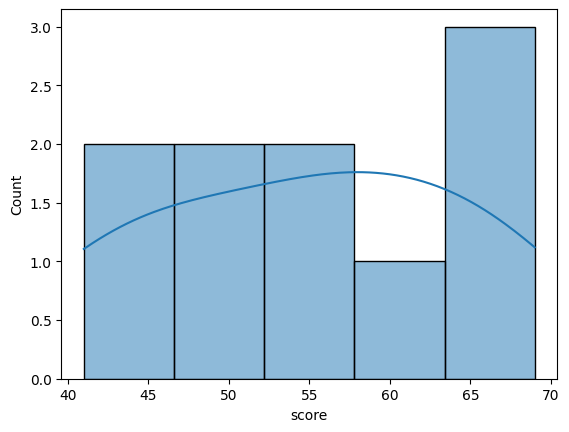

In [22]:
import seaborn as sns

sns.histplot(data=scores_df,x='score',kde=True)

<Axes: xlabel='score', ylabel='Count'>

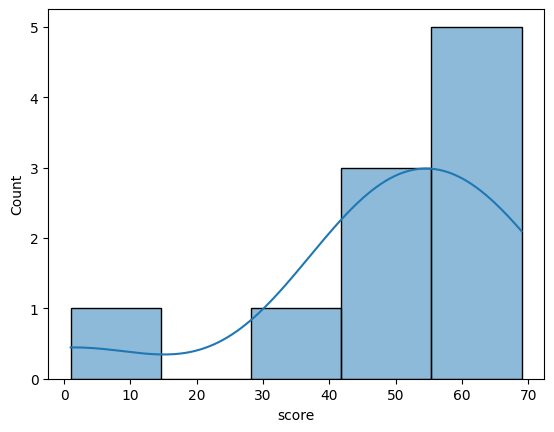

In [24]:
# 평균값 < 중앙값
import seaborn as sns
scores_df_a = scores_df.copy()
# print(scores_df_a)
scores_df_a.iloc[9,0] = 1
# print(scores_df_a)
sns.histplot(data=scores_df_a,x='score',kde=True)

In [25]:
scores_df_a.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


<Axes: xlabel='score', ylabel='Count'>

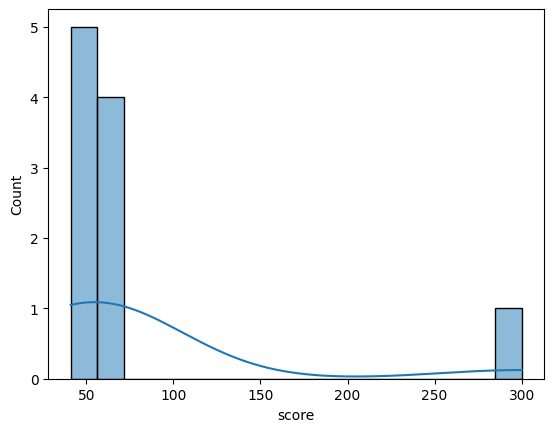

In [26]:
# 평균값 > 중앙값
scores_df_b = scores_df.copy()
scores_df_b.iloc[9,0] = 300
sns.histplot(data=scores_df_b,x='score',kde=True)

In [27]:
scores_df_b.describe()

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


Q. 다음 사항을 수행하세요.
- 평균 50, 표준편차 10인 정규 분포에서 100개 샘플 생성
- 기본 데이터의 평균과 중앙값 계산
- 데이터에 이상치 500 추가
- 이상치가 포함된 데이터의 평균과 중앙값 계산
- 이상치 포함에 따른 평균값과 중앙값간의 변화 설명

평균:  [50.46209047] 중앙값:  [50.78288157]
평균:  [54.85121992] 중앙값:  [50.78288157]


Text(0.5, 1.0, 'outlier data')

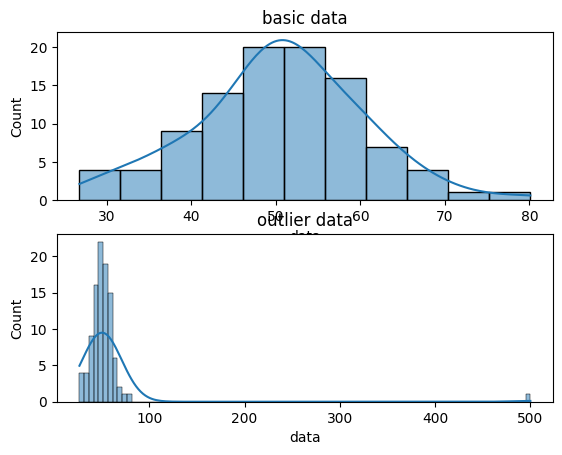

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#평균50, 표준편차 10인 정규 분포에서 100개 샘플 생성
data = np.random.normal(50, 10, 100)
df = pd.DataFrame({'data':data})
df.describe()

#기본 데이터의 평균과 중앙값 계산
print('평균: ', df.mean().values, '중앙값: ', df.median().values)

#데이터에 이상치 500 추가
df_copy = df.copy()
df_copy.iloc[0:1] = 500

# 이상치가 포함된 데이터의 평균과 중앙값 계산
print('평균: ', df_copy.mean().values, '중앙값: ', df_copy.median().values)

# 이상치 포함에 따른 평균값과 중앙값간의 변화 설명
fig, axes = plt.subplots(2,1)
plot1 = sns.histplot(data=df, x='data', kde=True, ax=axes[0])
plot1.set_title('basic data')
plot2 = sns.histplot(data=df_copy, x='data', kde=True, ax=axes[1])
plot2.set_title('outlier data')

In [29]:
import numpy as np

# 임의의 데이터 세트 생성
data = np.random.normal(50, 10, 100)  # 평균 50, 표준편차 10인 정규 분포에서 100개 샘플 생성

# 기본 데이터의 평균과 중앙값 계산
mean_initial = np.mean(data)
median_initial = np.median(data)

# 이상치 추가
data_with_outlier = np.append(data, [500])  # 데이터에 이상치 500 추가

# 이상치가 포함된 데이터의 평균과 중앙값 계산
mean_with_outlier = np.mean(data_with_outlier)
median_with_outlier = np.median(data_with_outlier)

mean_initial, median_initial, mean_with_outlier, median_with_outlier

(50.718071675622866, 51.27813516037618, 55.1664075996266, 51.89536894563293)

의미와 중요성

- 이상치의 영향: 평균값은 이상치에 의해 크게 왜곡될 수 있다. 예를 들어, 소득 데이터에서 몇몇 매우 높은 값(억만장자의 소득)이 평균을 크게 올릴 수 있지만, 중앙값은 이러한 극단적인 값의 영향을 덜 받는다.
- 데이터 분포의 대표성: 중앙값은 데이터의 분포가 비대칭일 때 데이터의 "중심"을 더 잘 나타내는 경향이 있다. 반면, 평균값은 데이터가 대칭적인 분포를 가질 때 중심 경향을 잘 나타낸다.
- 데이터 해석: 데이터 분석에서는 종종 평균값과 중앙값을 함께 사용하여 데이터의 분포를 더 잘 이해한다. 두 척도 사이에 큰 차이가 있다면, 이는 데이터에 이상치나 극단적인 값이 있다는 신호일 수 있다.
따라서 평균값과 중앙값을 선택할 때는 데이터의 특성과 분석의 목적을 고려해야 하며 이상치가 존재하거나 데이터가 비대칭적인 분포를 가질 경우, 중앙값이 더 적절할 수 있다. 반면, 데이터가 정규 분포를 이루는 경우, 평균값이 데이터를 대표하는 데 적합할 수 있다.

분산(Variance)과 표준편차(Standard Deviation)
- 통계학에서 데이터의 분포를 측정하는 데 사용되는 두 가지 중요한 개념.
- 이들은 데이터가 평균값으로부터 얼마나 퍼져 있는지(즉, 얼마나 분산되어 있는지)를 나타낸다.
- 분산과 표준편차는 데이터의 변동성을 이해하는 데 중요한 도구이며 이러한 측정값을 통해 데이터 집합의 일관성과 예측 가능성을 파악할 수 있다.

분산 (Variance)
- 정의: 데이터 포인트들이 평균에서 얼마나 멀리 떨어져 있는지를 측정하는 값.수학적으로 분산은 각 데이터 포인트와 평균값의 차이를 제곱한 후, 이를 모든 데이터 포인트의 개수로 나누어 평균을 낸 값.
- 의미: 분산이 크다는 것은 데이터 포인트들이 평균에서 멀리 떨어져 있다는 것을 의미하며, 이는 데이터가 넓게 퍼져 있다는 것을 나타낸다. 분산이 작다는 것은 데이터 포인트들이 평균값에 가깝게 모여 있다는 것을 의미하며 이는 데이터가 좁게 집중되어 있다는 것을 나타낸다.

표준편차 (Standard Deviation)
- 정의: 표준편차는 분산의 제곱근으로, 데이터 포인트들이 평균에서 얼마나 멀리 떨어져 있는지를 나타내는 또 다른 방법.
분산의 단위는 원래 데이터의 단위의 제곱이 되지만, 표준편차는 원래 데이터와 동일한 단위를 갖는다.
- 의미: 표준편차가 크다는 것은 데이터 포인트들이 평균에서 멀리 떨어져 있다는 것을 의미하며, 데이터가 넓게 분포되어 있다는 것을 나타낸다. 표준편차가 작다는 것은 데이터 포인트들이 평균값에 가까이 모여 있다는 것을 의미하며, 데이터가 좁게 집중되어 있다는 것을 나타낸다.

In [30]:
# 데이터의 산포도 지표
# 분산과 표준편차
# 편차(deviation)
print(scores_df.describe(),'\n')
mean = np.mean(scores)
print(mean)
print(scores)
deviation = scores - mean
print(deviation)

           score
count  10.000000
mean   55.000000
std     9.775252
min    41.000000
25%    48.250000
50%    56.500000
75%    63.250000
max    69.000000 

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]


In [ ]:
sum(deviation)
np.mean(deviation)

0.0

#### 분산
- 불편분산 : 불편분산(Unbiased Variance)은 표본 데이터를 사용하여 모집단의 분산을 추정할 때 편향을 최소화하기 위해 사용되는 개념
 * 일반적으로 표본 분산은 모분산을 과소평가하는 경향이 있는데, 불편분산은 이러한 편향을 조정
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산.
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨

[표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [39]:
# 모분산
fish_data = [1,2,3,4,5,6,7]
mu = 4
div = []
for f in fish_data:
  div.append((f-mu)**2)
print(div,'\n')
sum(div)/len(fish_data)

[9, 4, 1, 0, 1, 4, 9] 



4.0

In [42]:
# 표본분산
sample = [1,2,3]
# sample = [1,3,5,7]
# m = 4
m = 2
div = []
for s in sample:
  div.append((s-m)**2)
print(div,'\n')
sum(div)/len(sample)

[1, 0, 1] 



0.6666666666666666

In [43]:
# 넘파이 - 표본분산
np.mean(deviation ** 2)
np.var(scores)

86.0

In [44]:
# 판다스 - 불편분산
scores_df.var()

score    95.555556
dtype: float64

In [45]:
# 넘파이 - 불편분산
# np.var(scores,ddof=0)
np.var(scores,ddof=1)

95.55555555555556

In [46]:
# 판다스 - 표본분산
scores_df.var(ddof=0)
# scores_df.var(ddof=1)

score    86.0
dtype: float64

Q. 평균 0, 표준편차 1인 정규 분포에서 30개 샘플 생성해서 표본분산과 불편분산을 구하세요.


In [47]:
# 임의의 데이터 세트 생성
data = np.random.normal(0, 1, 30)  # 평균 0, 표준편차 1인 정규 분포에서 30개 샘플 생성

# 표본 분산 계산
sample_variance = np.var(data, ddof=0)

# 불편 분산 계산
unbiased_variance = np.var(data, ddof=1)

sample_variance, unbiased_variance

(0.8411412716448079, 0.8701461430808357)

Q. 다음 사항을 수행하여 표본 분산이 모집단 분산을 과소 평가하는 경향이 있음을 검증하세요.
- 10000개의 데이터 포인트를 가진 정규 분포 모집단에서 1000번의 표본(각각 30개의 데이터 포인트)을 추출
- 각 표본의 분산을 계산
- 표본 분산의 평균은 모집단 분산보다 약간 작다.

In [49]:
import numpy as np

# 10000개의 데이터 포인트를 가진 정규 분포 모집단에서 1000번의 표본 (각각 30개의 데이터 포인트)을 추출
data = np.random.normal(0, 1, 10000)
sample = np.random.choice(data, 1000)

# 각 표본의 분산을 계산
# 모분
mu = np.mean(data)
div = []
for d in data:
  div.append((d-mu)**2)
print('모분산: ', sum(div)/len(data))

# 표준분산
mu = np.mean(sample)
div = []
for s in sample:
  div.append((s-mu)**2)
print('표본분산: ', sum(div)/len(sample))

모분산:  0.9981478515220428
표본분산:  0.9548840252569741


In [37]:
# 모집단 정의 (평균 0, 표준편차 1인 정규 분포)
population = np.random.normal(0, 1, 10000)

# 모집단 분산
population_variance = np.var(population)

# 여러 개의 작은 표본 추출 및 표본 분산 계산
sample_variances = []
for _ in range(1000):
    sample = np.random.choice(population, 30)  # 표본 크기 30
    sample_var = np.var(sample, ddof=0)  # 표본 분산
    sample_variances.append(sample_var)

# 표본 분산의 평균
average_sample_variance = np.mean(sample_variances)

population_variance, average_sample_variance

(0.9901616595280102, 0.9576414020595574)

In [50]:
# 범위와 4분위수
# 범위
np.max(scores) - np.min(scores)

28

In [51]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [66]:
# 데이터의 시각화
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/통계/data/ch2_scores_em.csv',index_col='student number')

english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [67]:
# 도수분포표
freq,_=np.histogram(english_scores,bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [68]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [69]:
# freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq}, index=pd.Index(freq_class,name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [70]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [71]:
# 상대도수 : 해당 계급 데이터의 상대적인 비율
rel_freq = freq /freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [64]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [72]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value','frequency','relative_frequency','cumulative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [74]:
freq_dist_df.frequency.idxmax()

'60~70'

In [73]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']

65

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

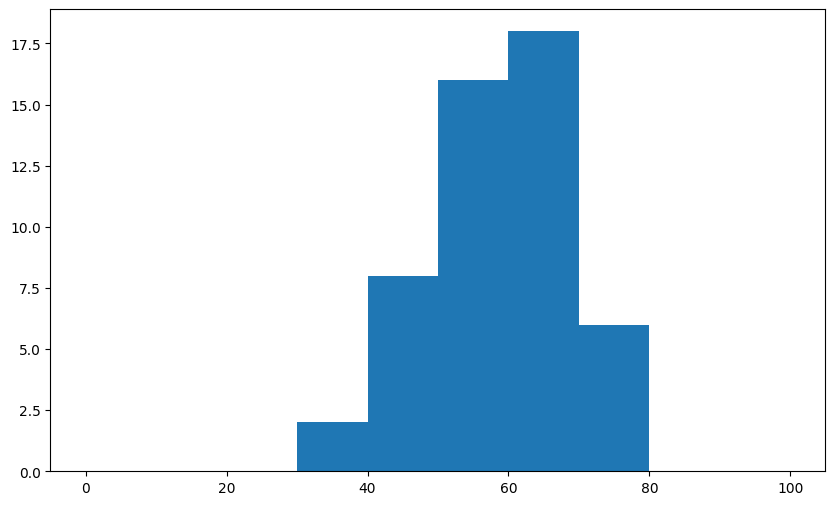

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores,bins=10,range=(0,100))

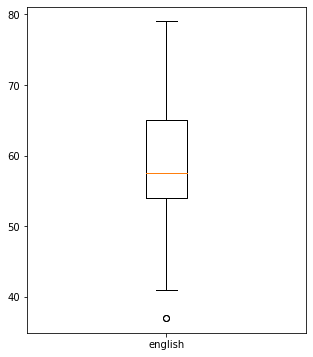

In [ ]:
# box plot
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,6))
plt.boxplot(english_scores,labels=['english'])
plt.show()

In [ ]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

## 2차원 데이터

공분산 :
 - 공분산 : 2개의 연속형 변수의 관계성을 확인하는 통계량
 - 공분산이 0보다 클 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 커짐
 - 공분산이 0보다 작을 때 : 변수 한쪽이 큰 값을 갖게되면 다른 한 쪽도 작아짐
 - 공분산이 0일 때 : 변수 사이에 관계성이 없음
 - 공분산은 편리한 지표지만 최대값이나 최소값이 얼마가 될 지 알 수가 없으며
 - 단위가 cm에서 m로 변하면 공분산의 값도 변함. 사용이 편하도록 -1 ~ +1의 범위로 보정

피어슨 상관계수 : 공분산을 최대값 1, 최소값 -1 사이가 되도록 표준화
 - cov / sp.sqrt(sigma_2_x * sigma_2_y)
 - 상관행렬 : 여러 변수의 상관계수들을 행렬 형태로 정리
 - 상관계수가 무의미할 때 : 상관계수가 0에 가까운 값을 가질 때는 실제 그래프로 관계를 확인

In [76]:
import numpy as np

# Example data arrays
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([5, 4, 3, 2, 1])

# 공분산 행렬은 대각선 요소가 개별 데이터 집합의 분산을 나타내고 비대각선 요소가 데이터 집합 간의 공분산을 나타내는 2x2 행렬
covariance_matrix = np.cov(data1, data2)

# Extracting the covariance value
covariance = covariance_matrix[0, 1]

print("Covariance matrix:\n", covariance_matrix)
print("Covariance between data1 and data2:", covariance)


Covariance matrix:
 [[ 2.5 -2.5]
 [-2.5  2.5]]
Covariance between data1 and data2: -2.5


공분산 행렬 (Covariance Matrix)
- 정의: 공분산 행렬은 여러 변수들 간의 공분산을 포함하는 정사각 행렬. 공분산은 두 변수의 상호 변동성을 나타낸다. 즉, 한 변수가 증가할 때 다른 변수가 어떻게 변하는지를 보여준다.
- 계산:
$$ Cov(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \mu_X) \cdot (y_i - \mu_Y)}{n - 1}$$

- 해석: 공분산이 양수이면 두 변수가 함께 증가. 공분산이 음수이면 한 변수가 증가할 때 다른 변수가 감소. 공분산의 크기는 변수들 간의 관계 강도를 정확히 나타내지 않으며, 단위에 의존적이다.

상관계수 행렬 (Correlation Matrix)
- 정의: 상관계수 행렬은 여러 변수들 간의 상관계수를 포함하는 정사각 행렬. 상관계수는 두 변수 간의 선형 관계의 강도와 방향을 나타낸다.
- 계산: 피어슨 상관계수는 다음 공식으로 계산
$$r_{xy} = \frac{\sum_{i=1}^{n} (x_i - \mu_X) \cdot (y_i - \mu_Y)}{\sqrt{\sum_{i=1}^{n} (x_i - \mu_X)^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \mu_Y)^2}}$$
- 해석: 상관계수의 범위는 -1에서 +1까지이다.
+1은 완벽한 양의 선형 관계를, -1은 완벽한 음의 선형 관계를, 0은 선형 관계의 부재를 나타낸다. 상관계수는 두 변수 간 관계의 방향과 강도를 모두 나타내며, 단위에 영향을 받지 않는다.

In [77]:
# Function to calculate covariance
def calculate_covariance(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    covariance = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n)) / (n - 1)
    return covariance

# Example data
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]

# Calculating the covariance
covariance = calculate_covariance(data1, data2)
print("Covariance:", covariance)


Covariance: -2.5


In [ ]:
def calculate_correlation(X, Y):
    if len(X) != len(Y):
        return "Data sets must be of equal length."

    n = len(X)
    mean_X = sum(X) / n
    mean_Y = sum(Y) / n

    numerator = sum((X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n))
    denominator = (sum((X[i] - mean_X) ** 2 for i in range(n)) * sum((Y[i] - mean_Y) ** 2 for i in range(n))) ** 0.5

    if denominator == 0:
        return "Division by zero error in calculation."

    correlation_coefficient = numerator / denominator
    return correlation_coefficient

# Example data
data1 = [1, 2, 3, 4, 5]
data2 = [5, 4, 3, 2, 1]

# Calculating the correlation coefficient
correlation = calculate_correlation(data1, data2)
print("Correlation Coefficient:", correlation)


Correlation Coefficient: -1.0


Q. scores_df에서 두 변수의 공분산과 상관계수를 구하세요.

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/kdt_231026/m3_분석라이브러리/통계/data/ch2_scores_em.csv',index_col='student number')
df.head()

In [ ]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index=pd.Index(list('ABCDEFGHIJ'),name='student'))
scores_df

In [90]:
# 공분산
# np.var() 함수: 이 함수는 분산을 계산할 때 기본적으로 ddof=0을 사용하는 반면
# np.cov() 함수: 이 함수는 공분산을 계산할 때 기본적으로 ddof=1을 사용
cov = np.cov(en_scores,ma_scores, ddof=0) # 표본분산
# cov = np.cov(en_scores,ma_scores)
# cov = np.cov(en_scores,ma_scores,ddof=1) # Default
cov[0,1]

62.800000000000004

In [85]:
# 상관계수
cor = np.corrcoef(en_scores,ma_scores)
cor[0,1]

0.8185692341186712

In [ ]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()
summary_df['mathematics_deviation'] = summary_df.mathematics - summary_df.mathematics.mean()
summary_df['product of deviation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [ ]:
print(np.var(scores_df.english))
print(np.var(scores_df.mathematics))

86.0
68.44000000000001


In [ ]:
summary_df['product of deviation'].mean()

62.8

In [ ]:
# np.cov(en_scores,ma_scores,ddof=1)
np.cov(en_scores,ma_scores,ddof=0)

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [ ]:
# n-1로 나눔
np.cov(en_scores,ma_scores, ddof=1) # default

array([[95.55555556, 69.77777778],
       [69.77777778, 76.04444444]])

In [ ]:
# 상관계수
np.cov(en_scores,ma_scores,ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [ ]:
np.corrcoef(en_scores,ma_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [ ]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


Q1_0118. english와 mathematices 2차원 데이터간의 관계를 시각화하여 탐색하세요.
- histogram
- boxplot
- scatter plot(regplot, lmplot)
- jointplot
- heatmap

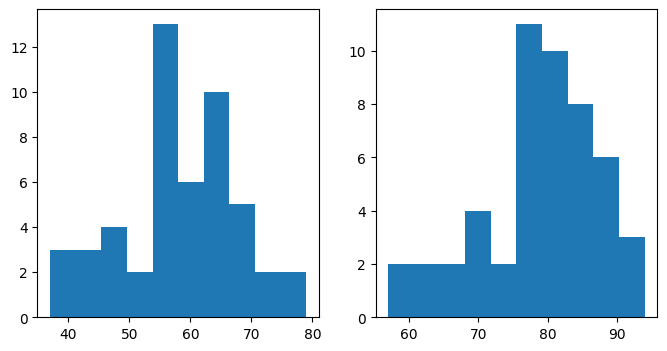

In [100]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.hist(df.english)
ax2.hist(df.mathematics)
plt.show()

Text(0, 0.5, 'Mathematices')

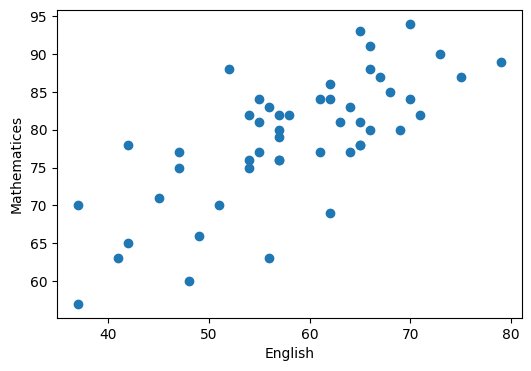

In [95]:
import matplotlib.pyplot as plt

english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

plt.figure(figsize=(6,4))
plt.scatter(english_scores,math_scores)
plt.xlabel('English')
plt.ylabel('Mathematices')

<Axes: xlabel='english', ylabel='mathematics'>

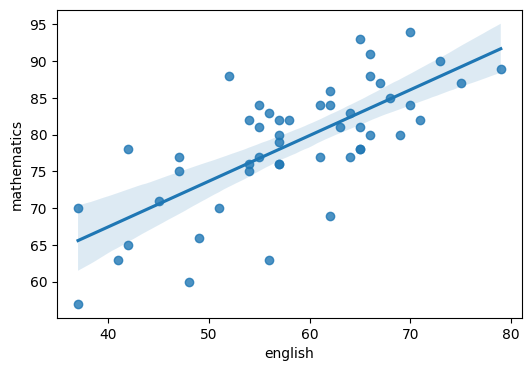

In [96]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.regplot(data=df,x='english',y='mathematics')

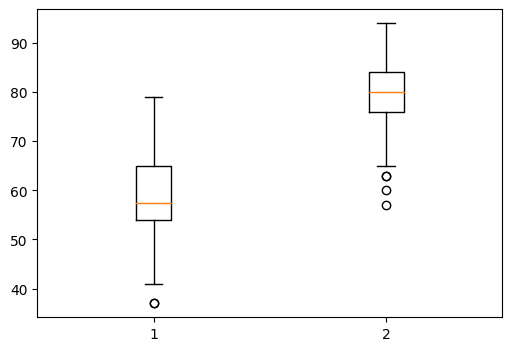

In [97]:
# sns.boxplot(data=df,x='english')
plt.figure(figsize=(6,4))
plt.boxplot([english_scores,math_scores])
plt.show()

<Figure size 600x400 with 0 Axes>

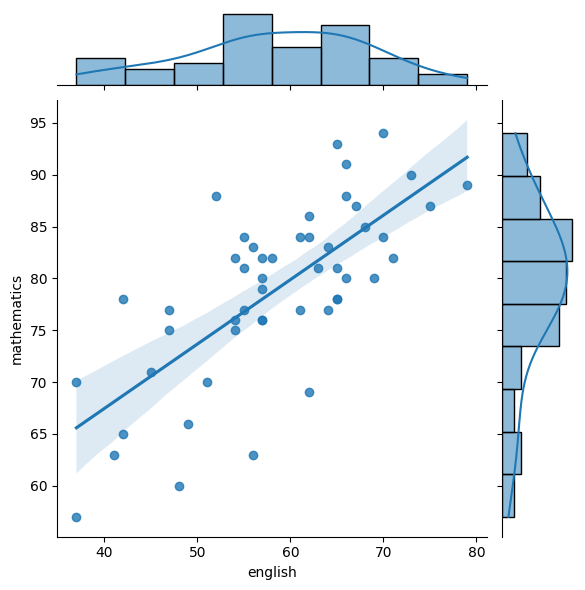

In [99]:
# jointplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.jointplot(data=df, x='english', y='mathematics', kind='reg')
plt.show()

<Axes: >

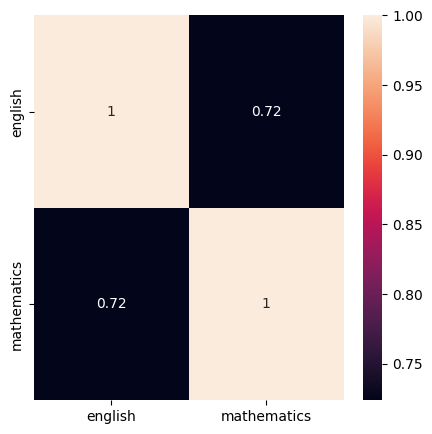

In [101]:
# 히트맵
plt.figure(figsize=(5,5))
sns.heatmap(df[['english','mathematics']].corr(),annot=True)

Q2_0118. 주어진 숫자 배열(예: [4, 8, 15, 16, 23, 42])에 대해 평균과 중앙값을 계산한 후 배열에 두 개의 극단값을 추가한 후(예: -100, 100), 다시 평균과 중앙값을 계산하고 비교하세요.

In [102]:
import numpy as np
from scipy import stats

# 평균과 중앙값 계산
data = np.array([4, 8, 15, 16, 23, 42])
mean1 = np.mean(data)
median1 = np.median(data)
print(mean1, median1)
# 극단값 추가
data_extreme = np.append(data, [-100, 100])
mean2 = np.mean(data_extreme)
median2 = np.median(data_extreme)
print(mean2, median2)

18.0 15.5
13.5 15.5


Q3_0118. 아래 두개의 데이터로 공분산(covariance)과 상관계수를 계산하세요.
- data1 = [65, 72, 78, 65, 72, 70, 65, 68]
- data2 = [72, 69, 74, 66, 70, 75, 65, 72]

In [104]:
data1 = [65, 72, 78, 65, 72, 70, 65, 68]
data2 = [72, 69, 74, 66, 70, 75, 65, 72]
print(np.cov(data1,data2, ddof=0)[0,1])
print(np.corrcoef(data1,data2)[0,1])

7.859375
0.5453950193321363


Q4_0118. 두 개의 변수를 갖는 데이터셋(예: 사람의 키와 몸무게) 을 생성한 후 두 변수 간의 피어슨 상관계수를 계산하여 그들 사이의 선형 관계를 분석하세요.

In [105]:
height = np.random.normal(170, 10, 100)  # 평균 170, 표준편차 10인 키 데이터
weight = height * 0.5 + np.random.normal(0, 5, 100)  # 키와 관련된 몸무게 데이터
correlation = np.corrcoef(height, weight)[0, 1]
print(correlation)

0.7951838093039574


Q5_0118. 주어진 데이터 배열의 사분위수(제1사분위수, 중앙값, 제3사분위수)를 계산한 후 데이터의 10번째 백분위수와 90번째 백분위수를 계산하여 출력하세요.
- data = np.arange(1000)

In [106]:
# 주어진 데이터 배열
data = np.arange(1000)

# 사분위수 (제1사분위수, 중앙값, 제3사분위수) 계산
quartiles = np.percentile(data, [25, 50, 75])

# 10번째 백분위수와 90번째 백분위수 계산
percentile_10 = np.percentile(data, 10)
percentile_90 = np.percentile(data, 90)

print(quartiles, percentile_10, percentile_90)

[249.75 499.5  749.25] 99.9 899.1


Q6_0118. 아래 데이터를 0~1 범위로 조정하여 정규화 하여 출력하세요.
- data = np.array([[1], [2], [3], [4], [5]])

In [ ]:
# 최소-최대 조정은 각 특성을 주어진 범위(일반적으로 0~1)로 조정하여 특성을 변환
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.array([[1], [2], [3], [4], [5]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

Q7_0118. Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화하세요.(평균이 0이고 분산이 1이 되도록 특성의 크기를 조정)
- data = np.array([[1], [2], [3], [4], [5]])

In [ ]:
# Z-점수 정규화를 사용하여 주어진 데이터 배열을 표준화. 표준화는 평균이 0이고 분산이 1이 되도록 특성의 크기를 조정
from sklearn.preprocessing import StandardScaler

data = np.array([[1], [2], [3], [4], [5]])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

Q. 타이타닉 데이터셋에서 age, fare 컬럼을 선택하여 공분산 행렬, 공분산, 상관계수 행렬 및 상관계수을 각각 구하여 비교하세요.


In [93]:
import seaborn as sns
import pandas as pd

# 타이타닉 데이터셋 로드
titanic = sns.load_dataset('titanic')

# 선택된 컬럼: 'age', 'fare'
selected_columns = ['age', 'fare']

# 공분산 행렬 계산
cov_matrix = titanic[selected_columns].cov()

# 상관계수 행렬 계산
corr_matrix = titanic[selected_columns].corr()

print("공분산 행렬:")
print(cov_matrix)
print("\n상관계수 행렬:")
print(corr_matrix)
print("\n공분산:")
print(cov_matrix.iloc[0,1])
print("\n상관계수:")
print(corr_matrix.iloc[0,1])


공분산 행렬:
             age         fare
age   211.019125    73.849030
fare   73.849030  2469.436846

상관계수 행렬:
           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000

공분산:
73.84902981461939

상관계수:
0.09606669176903912


선형 회귀 모델은 여러 중요한 가정에 기반하며 이 가정들이 충족될 때, 선형 회귀 분석은 가장 효과적

선형성 (Linearity)
- 의미: 선형 회귀의 가장 기본적인 가정은 종속 변수와 독립 변수 간의 관계가 선형적이라는 것. 즉, 독립 변수의 변화가 종속 변수의 변화를 선형적으로 설명할 수 있어야 한다.
- 검증 방법: 산점도(Scatter plot)를 통해 독립 변수와 종속 변수 간의 관계를 시각적으로 확인할 수 있다. 선형 패턴을 보이면 이 가정이 충족된 것으로 볼 수 있다.

독립성 (Independence)
- 의미: 독립 변수들이 서로 독립적이라는 가정. 즉, 모델의 어떤 한 독립 변수가 다른 독립 변수에 의존해서는 안 된다.
- 검증 방법: 독립성은 다중공선성(Multicollinearity)의 부재를 통해 검증. 다중공선성은 변수 간 상관관계가 높은 경우 발생하며, 이를 검증하기 위해 상관 계수 행렬이나 분산팽창계수(Variance Inflation Factor, VIF)를 사용할 수 있다.

정규성 및 등분산성 (Normality and Homoscedasticity)
- 정규성: 오차 항이 정규 분포를 따른다는 가정. 이는 통계적 추정과 검정이 유효하게 작동하기 위해 중요.
- 등분산성: 오차 항이 모든 독립 변수 값에 대해 일정한 분산을 가져야 한다는 가정. 이를 '등분산성' 또는 'Homoscedasticity'라고 합니다.

이 세 가지 가정은 선형 회귀 모델이 데이터를 잘 설명하고, 추정이 신뢰할 수 있는지 판단하는 데 핵심. 가정들이 충족되지 않는 경우, 데이터 변환, 다른 종류의 회귀 모델 사용 등의 방법으로 문제를 해결할 수 있다.

데이터 스케일링 및 정규화

In [107]:
# 데이터의 정규화
print(scores)
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차: 9.2736


In [108]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [109]:
55.0 + z*scores.std()

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [111]:
# 표준화 과정을 통해 체중과 키 데이터가 평균 0 주변에서 어떻게 분포하는지를 확인
# 표준화를 위한 데이터셋: 체중(kg)과 키(cm)
weights = np.array([55, 80, 65])
heights = np.array([160, 175, 168])

# 체중과 키 표준화
standardized_weights = (weights - np.mean(weights)) / np.std(weights)
standardized_heights = (heights - np.mean(heights)) / np.std(heights)

standardized_weights, standardized_heights,

(array([-1.13554995,  1.29777137, -0.16222142]),
 array([-1.25103507,  1.19664225,  0.05439283]))

In [112]:
# 정규화 과정을 통해 주택 가격과 크기 데이터가 0과 1 사이의 범위로 조정
# 정규화를 위한 데이터셋: 주택 가격(백만 원)과 주택 크기(제곱미터)
prices = np.array([500, 800, 650])
sizes = np.array([50, 75, 70])

# 주택 가격과 크기 정규화
normalized_prices = (prices - np.min(prices)) / (np.max(prices) - np.min(prices))
normalized_sizes = (sizes - np.min(sizes)) / (np.max(sizes) - np.min(sizes))

normalized_prices, normalized_sizes

(array([0. , 1. , 0.5]), array([0. , 1. , 0.8]))

 표준화
 - 데이터가 평균을 중심으로 어떻게 분포하는지를 보여준다.
 - 이는 변수 간의 관계를 비교하는 데 유용하며, 체중과 키의 상관관계를 더 명확하게 파악
 - 표준화는 데이터를 중심화하고 척도를 일관되게 만들어 준다

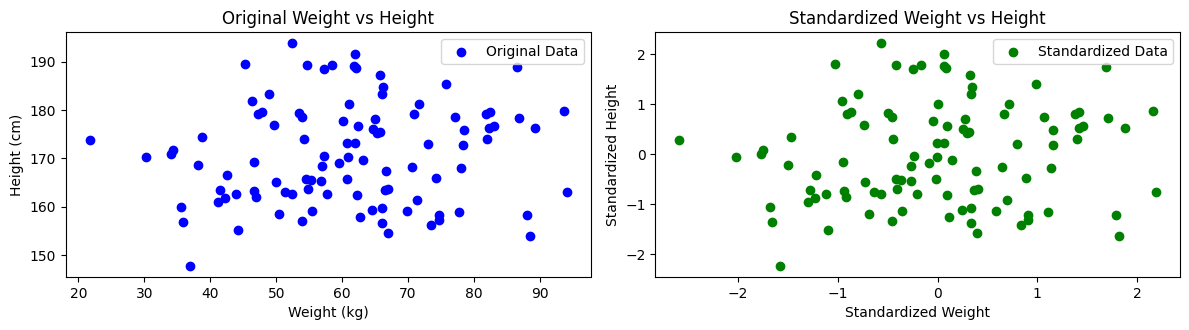

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# 확장된 데이터셋 생성
np.random.seed(0)
weights_expanded = np.random.normal(60, 15, 100)  # 평균 60kg, 표준편차 15kg의 체중 데이터
heights_expanded = np.random.normal(170, 10, 100) # 평균 170cm, 표준편차 10cm의 키 데이터

# 표준화
standardized_weights_expanded = (weights_expanded - np.mean(weights_expanded)) / np.std(weights_expanded)
standardized_heights_expanded = (heights_expanded - np.mean(heights_expanded)) / np.std(heights_expanded)


# 시각화
plt.figure(figsize=(12, 6))

# 원본 체중과 키 데이터 플롯
plt.subplot(2, 2, 1)
plt.scatter(weights_expanded, heights_expanded, color='blue', label='Original Data')
plt.title('Original Weight vs Height')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.legend()

# 표준화된 체중과 키 데이터 플롯
plt.subplot(2, 2, 2)
plt.scatter(standardized_weights_expanded, standardized_heights_expanded, color='green', label='Standardized Data')
plt.title('Standardized Weight vs Height')
plt.xlabel('Standardized Weight')
plt.ylabel('Standardized Height')
plt.legend()

plt.tight_layout()
plt.show()

정규화
- 모든 데이터 포인트가 0과 1 사이의 범위로 조정되어, 가격과 크기를 동일한 척도에서 비교
- 정규화는 다양한 척도의 데이터를 동일한 범위로 조정하여 비교 가능

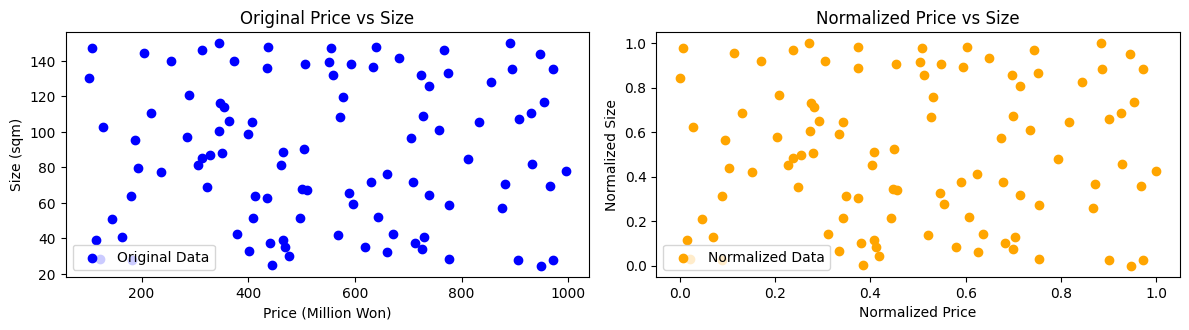

In [117]:
# 정규화를 위한 확장된 데이터셋
prices_expanded = np.random.uniform(100, 1000, 100) # 100만원에서 1000만원 사이의 주택 가격 데이터
sizes_expanded = np.random.uniform(20, 150, 100)   # 20제곱미터에서 150제곱미터 사이의 주택 크기 데이터

# 정규화
normalized_prices_expanded = (prices_expanded - np.min(prices_expanded)) / (np.max(prices_expanded) - np.min(prices_expanded))
normalized_sizes_expanded = (sizes_expanded - np.min(sizes_expanded)) / (np.max(sizes_expanded) - np.min(sizes_expanded))
plt.figure(figsize=(12, 6))

# 원본 주택 가격과 크기 데이터 플롯
plt.subplot(2, 2, 3)
plt.scatter(prices_expanded, sizes_expanded, color='blue', label='Original Data')
plt.title('Original Price vs Size')
plt.xlabel('Price (Million Won)')
plt.ylabel('Size (sqm)')
plt.legend()

# 정규화된 주택 가격과 크기 데이터 플롯
plt.subplot(2, 2, 4)
plt.scatter(normalized_prices_expanded, normalized_sizes_expanded, color='orange', label='Normalized Data')
plt.title('Normalized Price vs Size')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Size')
plt.legend()

plt.tight_layout()
plt.show()



로그변환
- 통계적 기법들은 데이터가 정규 분포를 따른다고 가정. 그러나 실제 데이터는 종종 비대칭적이거나 긴 꼬리를 가진 분포를 보이며 로그 변환은 이러한 데이터를 더 정규분포에 가깝게 만들어, 통계적 분석을 용이하게 한다.
- 로그 변환은 비선형 관계를 선형 관계로 변환하여, 선형 모델(예: 선형 회귀)을 적용할 수 있게 해준다.
- 데이터의 분산을 안정화시키는 효과가 있다. 특히, 큰 값에 의해 영향을 많이 받는 데이터(예: 소득, 인구)에서 유용. 로그 변환 후, 데이터 포인트들은 더 균일한 분산을 갖게 된다.
- 데이터의 소수 값(작은 값)을 증폭시켜, 이러한 값들이 분석에서 더 잘 드러나게 한다.


- 값이 0이 될 수 있는 데이터세트에서는 log(0)이 유효한 작업이 아니기 때문에 0 값에 대해 직접 로그 변환(np.log 사용)이 정의되지 않는다.
- np.log1p를 사용하면 log(1+0)=0처럼 수학적 오류 없이 0 값을 변환

In [ ]:
import numpy as np

# Sample data which includes a zero
data = np.array([0, 0.01, 0.1, 1, 10])

# Applying log1p transformation
log1p_transformed_data = np.log1p(data)
log1p_transformed_data

array([0.        , 0.00995033, 0.09531018, 0.69314718, 2.39789527])

로그 변환이 편향된 데이터의 분포에 어떻게 영향을 미칠 수 있는지 시각화하여 데이터를 보다 대칭적으로 만들고 추가 통계 분석 또는 기계 학습 모델링에 더 적합하게 만드는 데 도움

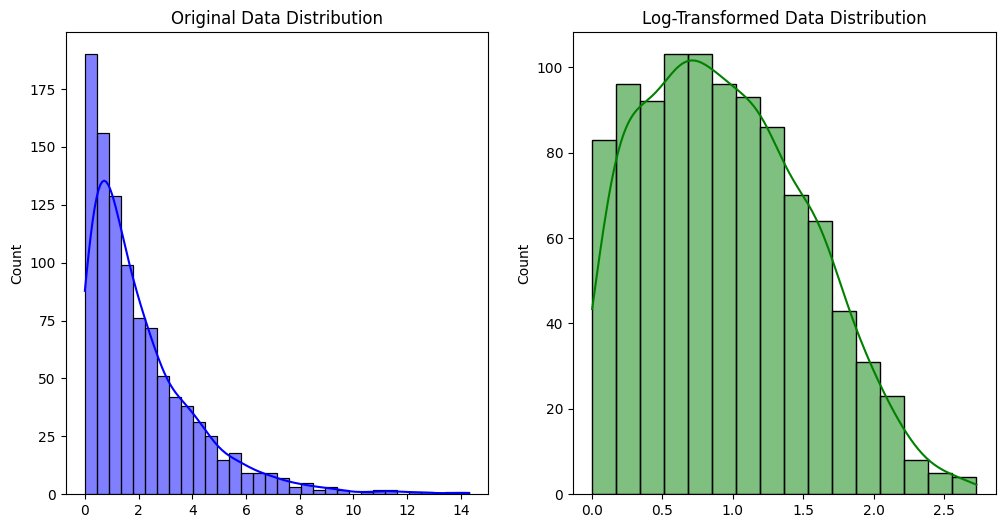

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random dataset with a skewed distribution (using exponential distribution)
data = np.random.exponential(scale=2.0, size=1000)

# Plotting the original data distribution
plt.figure(figsize=(12, 6))

# First subplot for the original data
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='blue')
plt.title("Original Data Distribution")

# Applying log transformation to the data
# np.log1p is used to handle the log transformation of data including zero values
log_transformed_data = np.log1p(data)

# Second subplot for the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, color='green')
plt.title("Log-Transformed Data Distribution")

# Display the plots
plt.show()


Q. 아래 데이터를 원본과 로그 변환한 결과를 1행 2열의 형태로 시각화 하세요.
- data = np.random.exponential(scale=5.0, size=999)

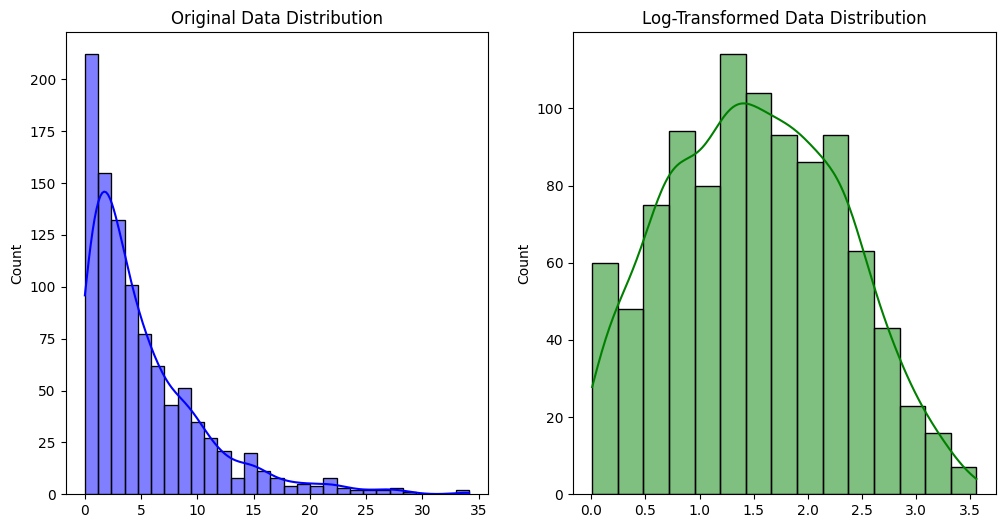

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a random dataset with a skewed distribution (using exponential distribution)
data = np.random.exponential(scale=5.0, size=999)

# Plotting the original data distribution
plt.figure(figsize=(12, 6))

# First subplot for the original data
plt.subplot(1, 2, 1)
sns.histplot(data, kde=True, color='blue')
plt.title("Original Data Distribution")

# Applying log transformation to the data
# np.log1p is used to handle the log transformation of data including zero values
log_transformed_data = np.log1p(data)

# Second subplot for the log-transformed data
plt.subplot(1, 2, 2)
sns.histplot(log_transformed_data, kde=True, color='green')
plt.title("Log-Transformed Data Distribution")

# Display the plots
plt.show()